In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('heart.csv')

# Check for missing values
print(df.isnull().sum())


# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [2]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)


In [3]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Add bias term
X_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_train)

# Predict
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]
y_pred = X_test_b.dot(theta_best)

# Evaluation
print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.5300387934563556
RMSE: 0.3381819573725495


In [4]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_reg.predict(X_test_scaled)

print("SGD R²:", r2_score(y_test, y_pred_sgd))
print("SGD RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_sgd)))


SGD R²: 0.5290127364884929
SGD RMSE: 0.33855092906548684


In [5]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)

print("Ridge R²:", r2_score(y_test, ridge.predict(X_test_scaled)))
print("Lasso R²:", r2_score(y_test, lasso.predict(X_test_scaled)))


Ridge R²: 0.5299834302249025
Lasso R²: 0.5197792315234371


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

print("LogReg Accuracy:", accuracy_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


LogReg Accuracy: 0.8532608695652174
F1 Score: 0.8695652173913043
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



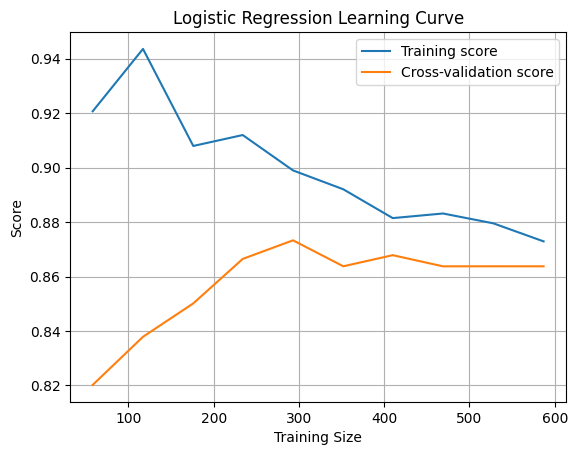

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train_scaled, y_train,
                                                            cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.plot(train_sizes, train_scores_mean, label='Training score')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend()
    plt.grid()
    plt.show()

plot_learning_curve(LogisticRegression(), "Logistic Regression Learning Curve")


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge alpha:", ridge_grid.best_params_)
print("Best Ridge R²:", ridge_grid.best_score_)


Best Ridge alpha: {'alpha': 10.0}
Best Ridge R²: 0.5550735512431084
